# Primer parte del proyecto (Solamente es para obtener valores)


### Creacion del conjunto de datos

In [1]:
import pandas as pd
import numpy as np

def generate_dataset1():

    np.random.seed(42)

    media_a = 120  
    desviacion_a = 10  

    
    media_b = 110  
    desviacion_b = 12  

    n_observaciones = 100

    tiempos_a = np.random.normal(loc=media_a, scale=desviacion_a, size=n_observaciones)
    tiempos_b = np.random.normal(loc=media_b, scale=desviacion_b, size=n_observaciones)

    df = pd.DataFrame({
        'Línea A (s)': np.round(tiempos_a, 2),
        'Línea B (s)': np.round(tiempos_b, 2)
    })


    return df.to_csv('../media/dataset_punto1.csv', index=False)


generate_dataset1()

dataset_general = pd.read_csv('../media/dataset_punto1.csv')

dataset_general


,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


### Obtener MTC (Medidas de tendencia de las columnas)




In [2]:
import pandas as pd
import numpy as np

def get_mtc(dataset):
    
    columns = ['Linea A (Media)','Linea B (Media)','Linea A (mediana)','Linea B (mediana)','Linea A (Moda)','Linea B (Moda)']
    
    data = []

    data.append(dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].mean())
    data.append(dataset['Línea A (s)'].median())
    data.append(dataset['Línea B (s)'].median())
    data.append(dataset['Línea A (s)'].mode()[0])
    data.append(dataset['Línea B (s)'].mode()[0])


    data = np.array(data).reshape(1,-1) #Redimensionar para quedar en el mismo tamaño de las columnas
    
    dataset = pd.DataFrame(data=data, columns=columns)

    return dataset


dataset_mtc = get_mtc(dataset_general)

dataset_mtc

,Linea A (Media),Linea B (Media),Linea A (mediana),Linea B (mediana),Linea A (Moda),Linea B (Moda)
0,118.9616,110.2674,118.73,111.01,117.66,115.68


In [3]:
def get_dispersion_metrics(dataset):

    columns = ['Línea A (STD)','Línea B (STD)','Línea A (VAR)','Línea B (VAR)','Línea A (Range)','Línea B (Range)','Línea A (Cof_Var)','Línea B (Cof_Var)',]

    data = []

    data.append(dataset['Línea A (s)'].std())
    data.append(dataset['Línea B (s)'].std())
    data.append(dataset['Línea A (s)'].var())
    data.append(dataset['Línea B (s)'].var())
    data.append(dataset['Línea A (s)'].max() - dataset['Línea A (s)'].min())
    data.append(dataset['Línea B (s)'].max() - dataset['Línea B (s)'].min())
    data.append(dataset['Línea A (s)'].std() / dataset['Línea A (s)'].mean())
    data.append(dataset['Línea B (s)'].std() / dataset['Línea B (s)'].mean())

    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_dispersion = get_dispersion_metrics(dataset_general)

dataset_dispersion

    

,Línea A (STD),Línea B (STD),Línea A (VAR),Línea B (VAR),Línea A (Range),Línea B (Range),Línea A (Cof_Var),Línea B (Cof_Var)
0,9.082117,11.44411,82.484846,130.967656,44.72,55.67,0.076345,0.103785


In [4]:
def get_form_metrics(dataset):
    
    columns = ['Línea A (Asimetria)','Línea B (Asimetria)','Línea A (Curtosis)','Línea B (Curtosis)']

    data = []

    data.append(dataset['Línea A (s)'].skew())
    data.append(dataset['Línea B (s)'].skew())
    data.append(dataset['Línea A (s)'].kurtosis())
    data.append(dataset['Línea B (s)'].kurtosis())

    
    data = np.array(data).reshape(1,-1)

    dataset = pd.DataFrame(columns=columns,data=data)

    return dataset


dataset_form = get_form_metrics(dataset_general)


dataset_form


,Línea A (Asimetria),Línea B (Asimetria),Línea A (Curtosis),Línea B (Curtosis)
0,-0.178085,0.3869,-0.100912,0.031035


### Graficos : Histogramas,Boxplot,Tallos


In [5]:
dataset_general

,Línea A (s),Línea B (s)
0,124.97,93.02
1,118.62,104.95
2,126.48,105.89
3,135.23,100.37
4,117.66,108.06
...,...,...
95,105.36,114.62
96,122.96,99.39
97,122.61,111.84
98,120.05,110.70


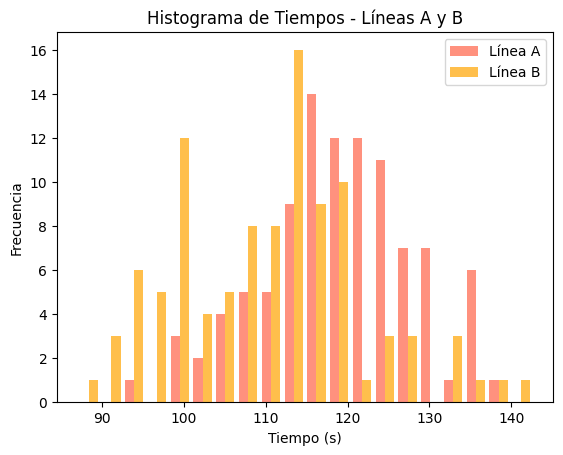

In [6]:
import matplotlib.pyplot as plt 

import numpy as np

fig, ax_hist = plt.subplots()

def create_hist():
    #Creamos el diagrama el historigrama
    ax_hist.hist([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']], #El primer argumento es la lista de los 2
                bins=20, alpha=0.7, label=['Línea A', 'Línea B'],
                color=['tomato', 'orange']) #Aqui lo mismo

    # Etiquetas y texto
    ax_hist.set_xlabel('Tiempo (s)')
    ax_hist.set_ylabel('Frecuencia')
    ax_hist.set_title('Histograma de Tiempos - Líneas A y B')
    ax_hist.legend()
    plt.show()


create_hist()

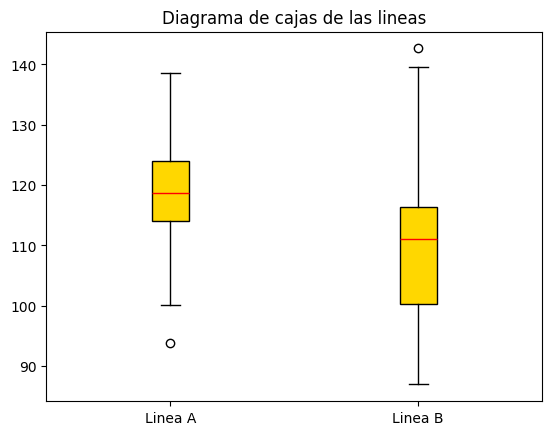

In [7]:
fig, ax_box_plot = plt.subplots()

def create_box_plots():
    #Creamos el boxplot
    ax_box_plot.boxplot([dataset_general['Línea A (s)'], dataset_general['Línea B (s)']],
                        vert=True,
                        tick_labels=['Linea A', 'Linea B'],  #Lista simple ,Usar en vez de labels tick_labels es mas nuevo
                        boxprops=dict(facecolor='gold'),
                        medianprops=dict(color='red'),
                        patch_artist=True)  

    ax_box_plot.set_title('Diagrama de cajas de las lineas')

    plt.show()

create_box_plots()



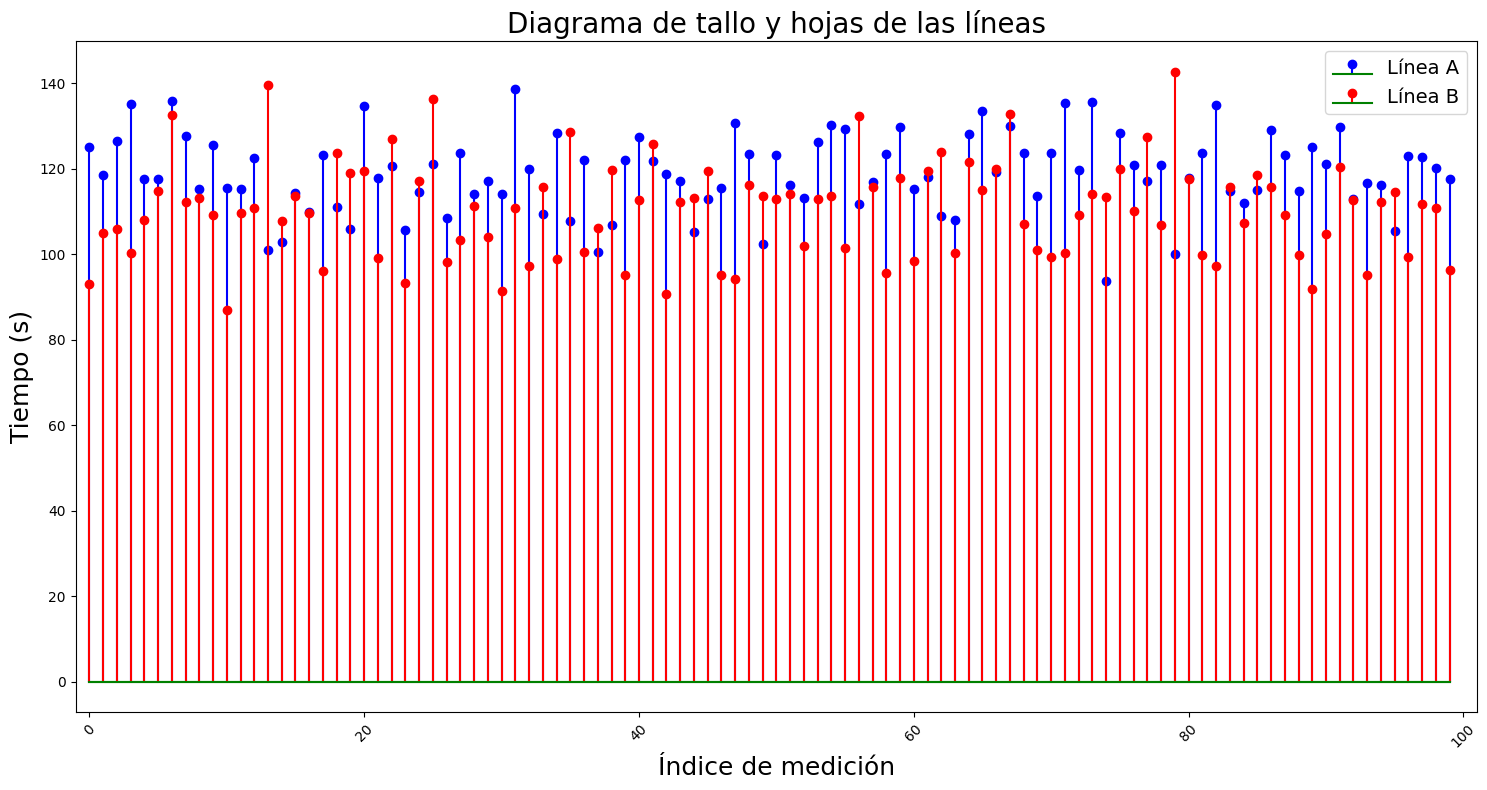

In [8]:
fig, ax_stem = plt.subplots(figsize=(15, 8))

def create_stem():
    
    linea_a = dataset_general['Línea A (s)']
    linea_b = dataset_general['Línea B (s)']
    
    
    # Crear el stem plot para Línea A
    ax_stem.stem(range(len(linea_a)), linea_a, #Siempre es la cantidad de datos y el dato
                linefmt='b-',      # Línea azul
                markerfmt='bo',    # Marcadores azules
                basefmt='g-',      # Línea base verde
                label='Línea A')
    
    # Crear el stem plot para Línea B
    ax_stem.stem(range(len(linea_b)), linea_b,
                linefmt='r-',      # Línea roja
                markerfmt='ro',    # Marcadores rojos
                basefmt='g-',      # Línea base verde
                label='Línea B')
    
    # Personalizar el gráfico
    ax_stem.set_title('Diagrama de tallo y hojas de las líneas', fontsize=20)
    ax_stem.set_xlabel('Índice de medición', fontsize=18)
    ax_stem.set_ylabel('Tiempo (s)', fontsize=18)
    
    ax_stem.set_xlim(-1, len(linea_a) + 1)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    ax_stem.legend(fontsize=14)
    
    plt.show()

create_stem()



In [ ]:
"""
Inciso b) Identificar distribución:
  • Ajustar Normal, Exponencial y Weibull
  • Kolmogorov–Smirnov y Anderson–Darling
"""

import numpy as np
import scipy.stats as stats

times_A = dataset_general['Línea A (s)']
times_B = dataset_general['Línea B (s)']

def fit_and_gof(data, dist_name, dist):
    """
    Ajusta la distribución dist a los datos y calcula:
      - Parámetros ajustados
      - Estadístico y p‑value de KS
      - Estadístico y valores críticos de AD (si aplica)
    """
    params = dist.fit(data)
    ks_stat, ks_p = stats.kstest(data, dist_name, args=params)
    try:
        ad = stats.anderson(data, dist=dist_name)
        ad_stat, ad_cv, ad_sig = ad.statistic, ad.critical_values, ad.significance_level
    except Exception:
        ad_stat, ad_cv, ad_sig = np.nan, None, None

    return {
        'params': params,
        'KS': {'stat': ks_stat, 'p': ks_p},
        'AD': {'stat': ad_stat, 'crit_vals': ad_cv, 'sign_levels': ad_sig}
    }

# Distribuciones a evaluar
distros = {
    'norm': stats.norm,
    'expon': stats.expon,
    'weibull_min': stats.weibull_min
}

gof_results = {}
for name, dist in distros.items():
    gof_results[name] = {
        'A': fit_and_gof(times_A,     name, dist),
        'B': fit_and_gof(times_B,     name, dist)
    }

# Mostrar resumen de p‑values de KS
for dist_name, res in gof_results.items():
    for linea in ['A','B']:
        ks = res[linea]['KS']
        print(f"{dist_name} - Línea {linea}: KS-stat={ks['stat']:.3f}, p={ks['p']:.3f}")


norm - Línea A: KS-stat=0.051, p=0.948
norm - Línea B: KS-stat=0.073, p=0.632
expon - Línea A: KS-stat=0.330, p=0.000
expon - Línea B: KS-stat=0.233, p=0.000
weibull_min - Línea A: KS-stat=0.061, p=0.824
weibull_min - Línea B: KS-stat=0.077, p=0.560


In [ ]:
"""
Inciso c) Usar la distribución normal ajustada:
  • P(T > 120)
  • t90 tal que P(T ≤ t90) = 0.90
"""

# Parámetros de la normal ajustada (desde gof_results['norm'])
params_A = gof_results['norm']['A']['params']
params_B = gof_results['norm']['B']['params']

dist_norm = stats.norm

# c.1) Probabilidad de exceder 120 s
p_exceed_120_A = 1 - dist_norm.cdf(120, *params_A)
p_exceed_120_B = 1 - dist_norm.cdf(120, *params_B)

print(f"P(T>120) Línea A: {p_exceed_120_A:.4f}")
print(f"P(T>120) Línea B: {p_exceed_120_B:.4f}")

# c.2) Percentil 90
t90_A = dist_norm.ppf(0.90, *params_A)
t90_B = dist_norm.ppf(0.90, *params_B)

print(f"t90 (Línea A): {t90_A:.2f} s")
print(f"t90 (Línea B): {t90_B:.2f} s")


P(T>120) Línea A: 0.4543
P(T>120) Línea B: 0.1964
t90 (Línea A): 130.54 s
t90 (Línea B): 124.86 s


In [ ]:
"""
Inciso d) Intervalos de confianza para la media (t-student)
"""

import scipy.stats as stats

def ci_mean(data, alpha=0.05):
    """
    Retorna (li, ls) del IC (1-alpha)*100% para la media,
    usando distribución t de Student.
    """
    n = len(data)
    m = data.mean()
    se = stats.sem(data)      # desviación estándar de la media
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    return (m - t_crit * se, m + t_crit * se)

ci_A = ci_mean(times_A)
ci_B = ci_mean(times_B)

print(f"IC 95% media Línea A: [{ci_A[0]:.2f}, {ci_A[1]:.2f}] s")
print(f"IC 95% media Línea B: [{ci_B[0]:.2f}, {ci_B[1]:.2f}] s")


IC 95% media Línea A: [117.16, 120.76] s
IC 95% media Línea B: [108.00, 112.54] s


In [ ]:
"""
Inciso e) Prueba t de Student (Welch) para comparar medias:
  H0: μA = μB
  H1: μA ≠ μB
"""

t_stat, p_val = stats.ttest_ind(times_A, times_B, equal_var=False)
print(f"t-stat = {t_stat:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("→ Rechazamos H0: diferencia significativa.")
else:
    print("→ No rechazamos H0: no hay evidencia de diferencia.")


t-stat = 5.951, p-value = 0.000
→ Rechazamos H0: diferencia significativa.
